In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns

Tools precision/recall/F1score 
Fig1 SupplementaryFig2 SupplementaryFig3

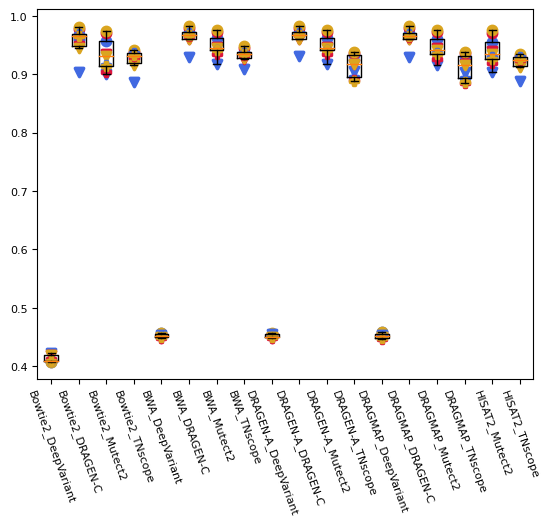

In [14]:
snv='snv_result.txt'
indel='indel_result.txt'
snv_df=pd.read_csv(snv,sep='\t', names=['Sample','Pipeline','Recall', 'Precision', 'F1score'])
indel_df=pd.read_csv(indel,sep='\t', names=['Sample','Pipeline','Recall', 'Precision', 'F1score'])
shape={'SRR13076390': 'o', 'SRR13076391': 'o', 'SRR13076392': 'o', 
       'SRR13076393': 'v', 'SRR13076394': 'v','SRR13076395': 'v',
       'SRR13076396': 'P', 'SRR13076397': 'P','SRR13076398': 'P'}
color={'SRR13076390': 'royalblue', 'SRR13076391': 'crimson', 'SRR13076392': 'goldenrod',
       'SRR13076393': 'royalblue', 'SRR13076394': 'crimson','SRR13076395': 'goldenrod',
       'SRR13076396': 'royalblue', 'SRR13076397': 'crimson','SRR13076398': 'goldenrod'}
# label of lib
lab1 = mpatches.Patch(color='royalblue', label='Lib1')
lab2 = mpatches.Patch(color='crimson', label='Lib2')
lab3 = mpatches.Patch(color='goldenrod', label='Lib3')
s1 = mlines.Line2D([], [],marker='o', color='black', markersize=40,linestyle='None', label='Agilent')
s2 = mlines.Line2D([], [],marker='v', color='black', markersize=40,linestyle='None', label='IDT')
s3 = mlines.Line2D([], [],marker='P', color='black', markersize=40,linestyle='None', label='Roche')

def data_process(df, pipeline_now, result):
    x = df[ df.Pipeline== pipeline_now ]
    return x[result]
#snv_df = snv_df.sort_values(by='Recall_avg', ascending=False)
x = np.arange(len(snv_df.Pipeline))
pipeline = snv_df.Pipeline.unique().tolist()

# data arrange
snv_data=[]
for pip in pipeline:
    snv_recall = data_process(snv_df, pip, 'F1score')
    snv_data.append(snv_recall)
    
plt.boxplot(snv_data, labels=pipeline, showmeans=False , positions=range(18), sym=' ')
# boxplot
plt.xticks(rotation = 290, fontsize=20)


# each point
sample_list=['SRR13076390', 'SRR13076391', 'SRR13076392', 'SRR13076393', 'SRR13076394', 'SRR13076395', 'SRR13076396', 'SRR13076397', 'SRR13076398']

for sample in sample_list: 
    df = snv_df[snv_df['Sample'] == sample]
    plt.scatter(df.Pipeline, df.F1score, marker=shape[sample], color=color[sample], 
                label=sample,  linewidth=2.5)



    

plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.show()

DP result Supplementary Fig2

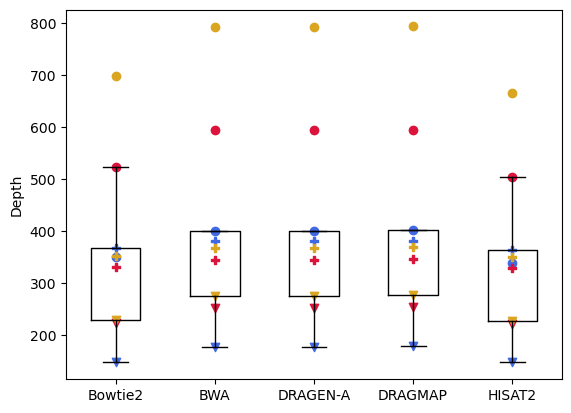

In [21]:
shape={'SRR13076390': 'o', 'SRR13076391': 'o', 'SRR13076392': 'o', 
       'SRR13076393': 'v', 'SRR13076394': 'v','SRR13076395': 'v',
       'SRR13076396': 'P', 'SRR13076397': 'P','SRR13076398': 'P'}
color={'SRR13076390': 'royalblue', 'SRR13076391': 'crimson', 'SRR13076392': 'goldenrod',
       'SRR13076393': 'royalblue', 'SRR13076394': 'crimson','SRR13076395': 'goldenrod',
       'SRR13076396': 'royalblue', 'SRR13076397': 'crimson','SRR13076398': 'goldenrod'}
sample = ['SRR13076390', 'SRR13076391', 'SRR13076392', 'SRR13076393',
       'SRR13076394', 'SRR13076395', 'SRR13076396', 'SRR13076397','SRR13076398']
tools = ['Bowtie2', 'BWA', 'DRAGEN-A', 'DRAGMAP','HISAT2']
df = pd.read_csv('DP_result.txt', sep = '\t',header = None)
# label of lib
lab1 = mpatches.Patch(color='royalblue', label='Lib1')
lab2 = mpatches.Patch(color='crimson', label='Lib2')
lab3 = mpatches.Patch(color='goldenrod', label='Lib3')

# label of scatter
s1 = mlines.Line2D([], [],marker='o', color='black',linestyle='None', label='Agilent')
s2 = mlines.Line2D([], [],marker='v', color='black',linestyle='None', label='IDT')
s3 = mlines.Line2D([], [],marker='P', color='black',linestyle='None', label='Roche')
df_data=[]

for tool in tools:
    df_data.append(df[df[1]==tool][2])



#scatter plot
for s in sample:
    df1 = df[df[0]==s]
    c = color[s]
    m = shape[s]
    plt.scatter(df1[1],df1[2],marker=m, color=c,label=s)

plt.boxplot(df_data,labels=tools,sym=' ', positions=[0,1,2,3,4], 
           medianprops={'lw':0}, meanline=True)


# xy label
plt.title('')
plt.ylabel('Depth')

plt.show()






Tools intersection F1score result Fig2


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

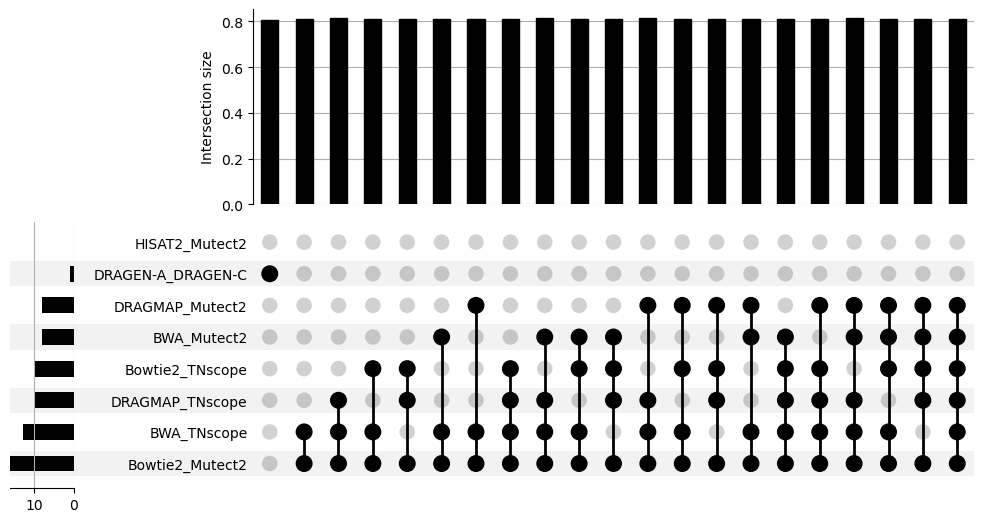

In [2]:
import upsetplot
from upsetplot import plot

dragen_indel = {'DRAGEN-A_DRAGEN-C':1,'Bowtie2_Mutect2':0, 'Bowtie2_TNscope':0, 'BWA_Mutect2':0, 'BWA_TNscope':0,
       'DRAGMAP_Mutect2':0, 'DRAGMAP_TNscope':0, 'HISAT2_Mutect2':0,
       'HISAT2_TNscope':0, 'Total_Variants':783, 'TP':534, 'Recall':0.990724, 'Precision':0.681992,
       'F1score':0.807867}
dragen_snv = {'DRAGEN-A_DRAGEN-C':1,'Bowtie2_Mutect2':0, 'Bowtie2_TNscope':0, 'BWA_Mutect2':0, 'BWA_TNscope':0,
       'DRAGMAP_Mutect2':0, 'DRAGMAP_TNscope':0, 'HISAT2_Mutect2':0,
       'HISAT2_TNscope':0, 'Total_Variants':42294, 'TP':41253, 'Recall':0.989922, 'Precision':0.975387,
       'F1score':0.9826}
df = pd.read_csv('INDEL_upsetplot_result.txt', sep='\t')
df = df.sort_values(by='F1score', ascending=False)[0:20]
df = df.append(dragen_indel, ignore_index=True).sort_values(by='F1score', ascending=False)

df = df.set_index(df.columns[0:8].tolist())
upsetplot.plot(df['F1score'])


Variant Allele Frequency Fig3

Text(0.5, -7.5, 'DRAGMAP_TNscope')

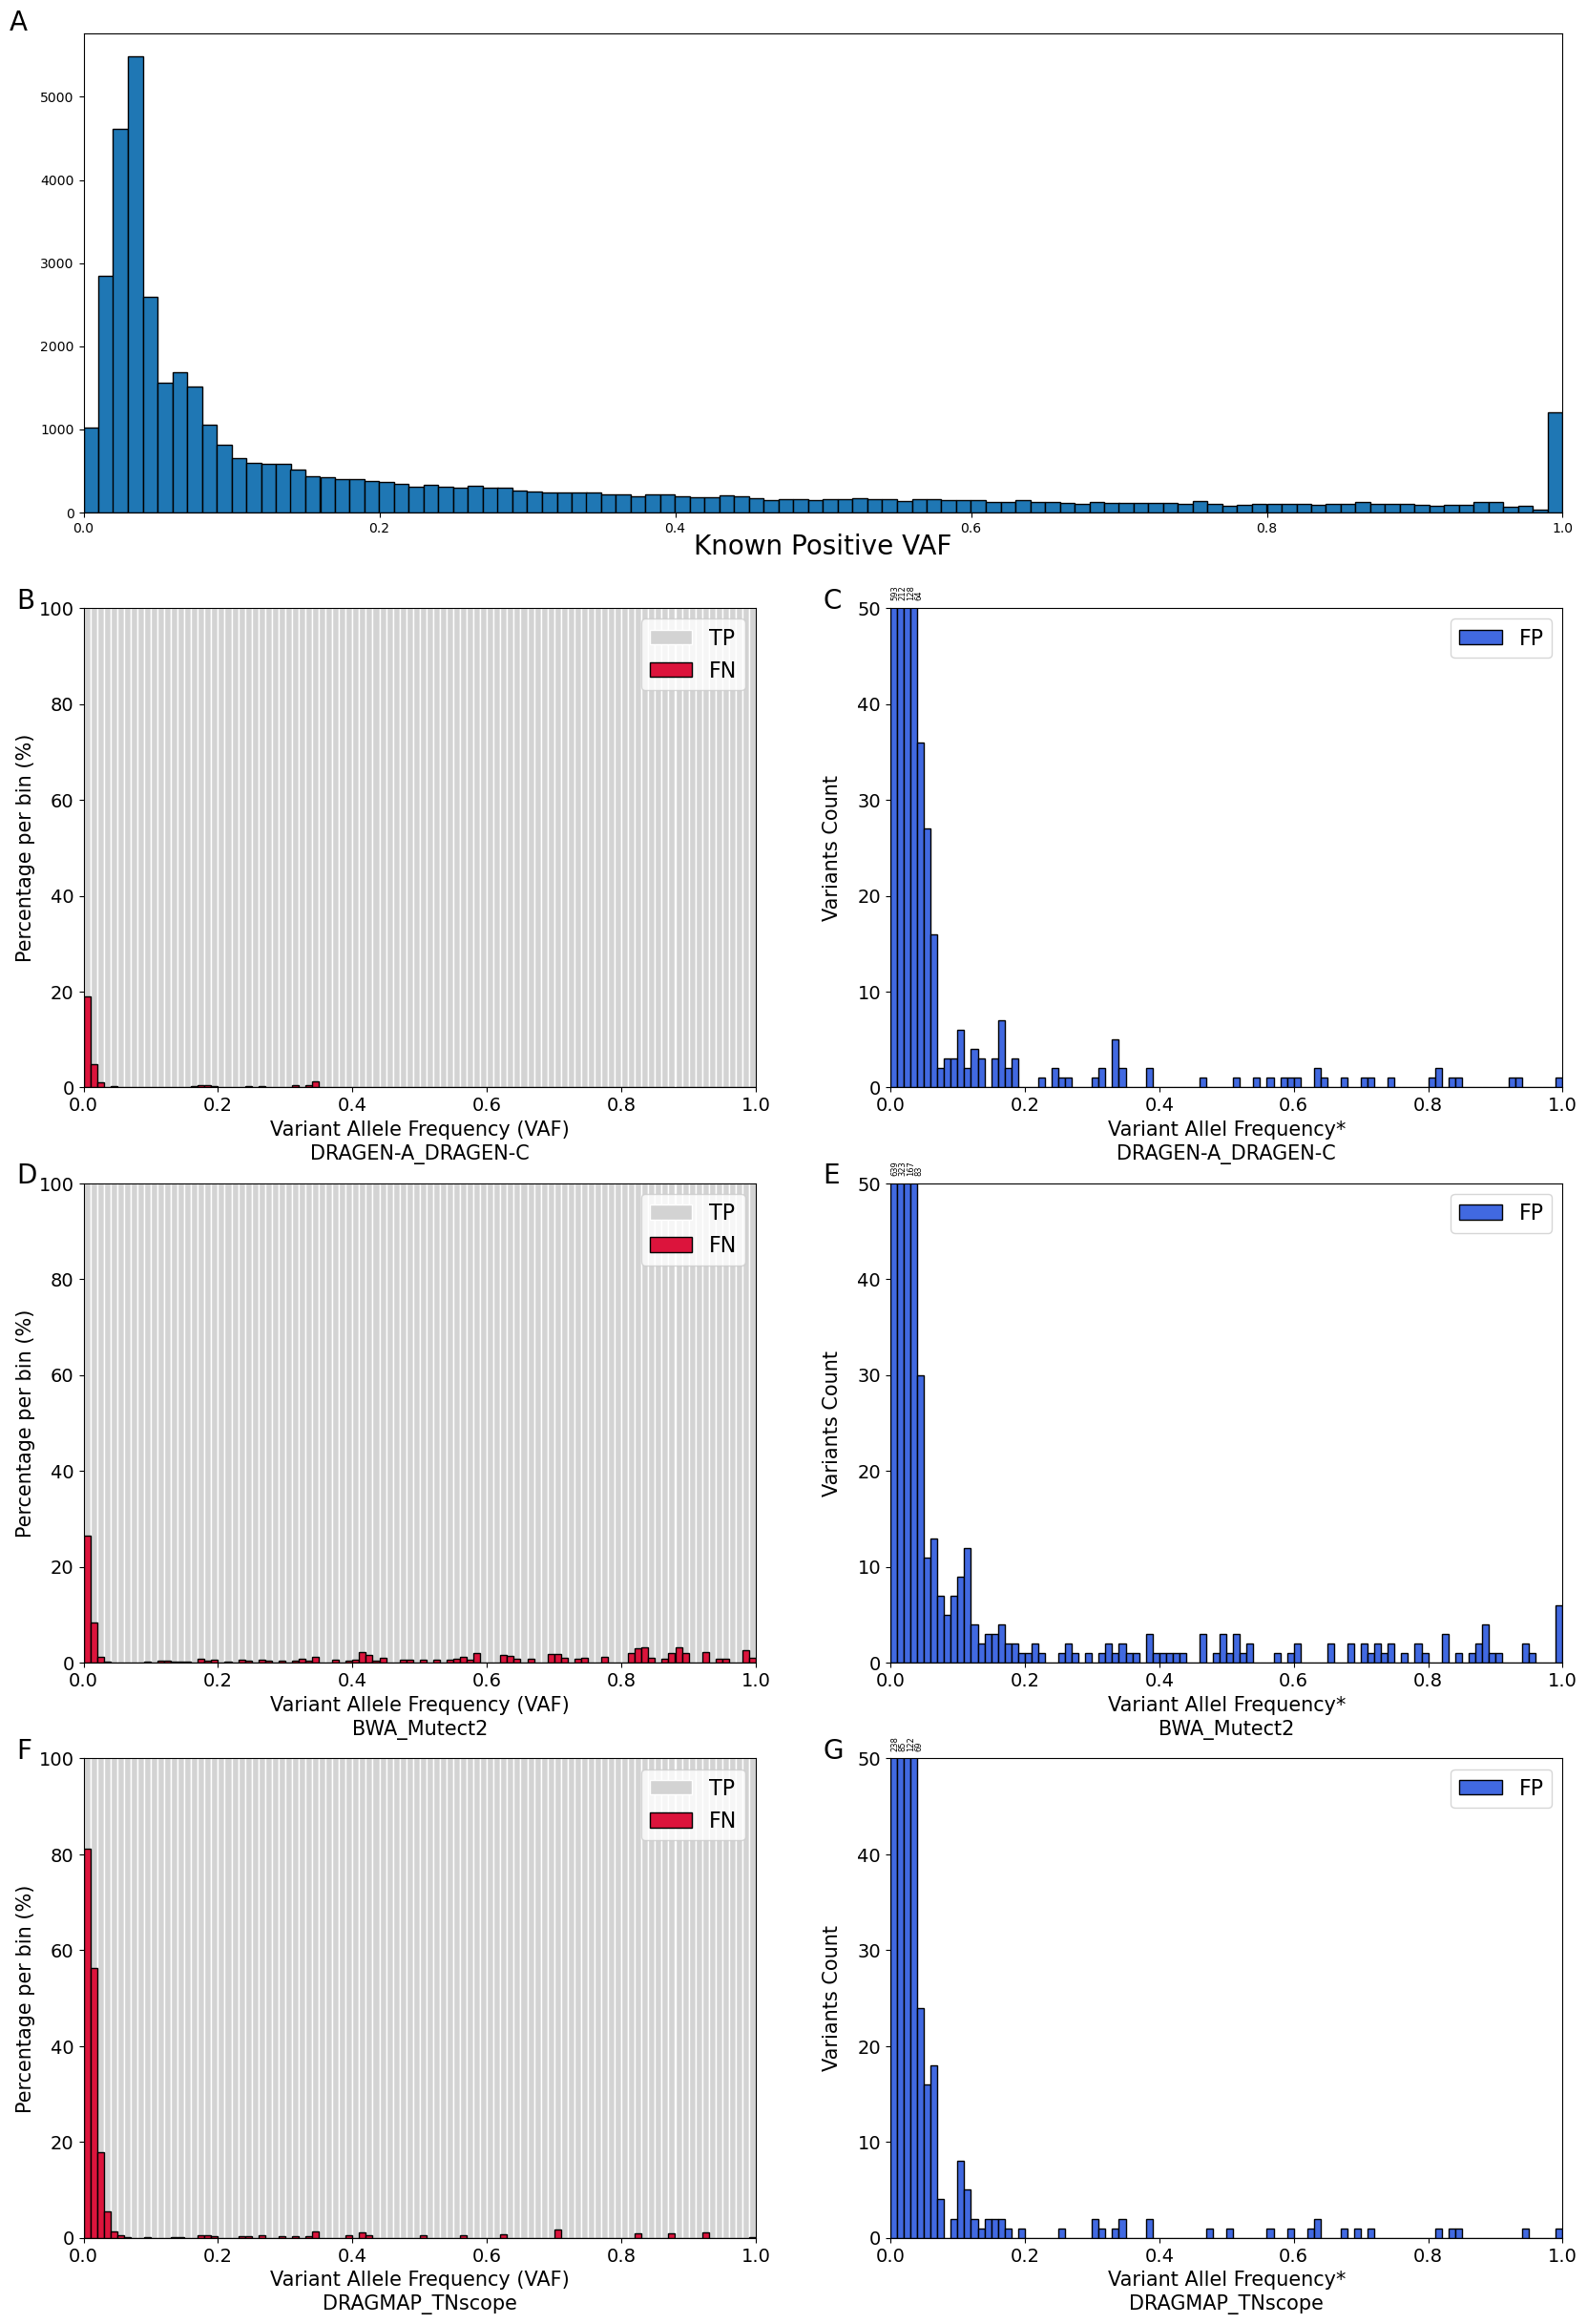

In [22]:
df2=pd.read_csv('VAF_dataframe.txt', sep='\t')
df2['D_FN'] = (df2['Dragen_A_Dragen_C_FN']/df2['Known'])*100
df2['B_FN'] = (df2['bwa_Mutect2_FN']/df2['Known'])*100
df2['M_FN'] = (df2['Dragmap_TNscope_FN']/df2['Known'])*100

plt.subplots(4,2,figsize=(20,30))
bottom=0
# Knownset distribution
fig1 = plt.subplot2grid((4,2),(0,0),rowspan=1,colspan=2)
fig1.bar(df2['Bin']-0.01,df2['Known'],edgecolor='black',width=0.01, align='edge')
fig1.margins(x=0)

# Dragen

fig2=plt.subplot(423)
fig2.bar(df2['Bin']-0.01,100, width=0.01, edgecolor='white',align='edge',label='TP',color='lightgray')
fig2.bar(df2['Bin']-0.01, df2['D_FN'], width=0.01, bottom=bottom,
         edgecolor='black', align='edge',label='FN',color='crimson')
fig2.set_xlim([0,1])
fig2.set_ylim([0,100])
fig2.legend(loc='upper right', prop={'size': 16})
fig2.margins(x=0)


fig3 = plt.subplot(424)
fig3.bar(df2['Bin']-0.01,df2['Dragen_A_Dragen_C_FP'],align='edge', width=0.01, 
         label='FP',edgecolor='black', color='royalblue')
fig3.set_xlim([0,1])
fig3.legend(loc='upper right', prop={'size': 16})
fig3.margins(x=0)

# Bwa
fig4=plt.subplot(425)
fig4.bar(df2['Bin']-0.01,100, width=0.01, edgecolor='white',align='edge',label='TP',color='lightgray')
fig4.bar(df2['Bin']-0.01, df2['B_FN'], width=0.01, bottom=bottom,
         edgecolor='black', align='edge',label='FN',color='crimson')
fig4.set_xlim([0,1])
fig4.set_ylim([0,100])
fig4.legend(loc='upper right', prop={'size': 16})
fig4.margins(x=0)


fig5 = plt.subplot(426)
fig5.bar(df2['Bin']-0.01,df2['bwa_Mutect2_FP'],align='edge', width=0.01, 
         label='FP',edgecolor='black', color='royalblue')
fig5.set_xlim([0,1])
fig5.legend(loc='upper right', prop={'size': 16})
fig5.margins(x=0)

# Dragmap

fig6 = plt.subplot(427)
fig6.bar(df2['Bin']-0.01,100, width=0.01, edgecolor='white',align='edge',label='TP',color='lightgray')
fig6.bar(df2['Bin']-0.01, df2['M_FN'], width=0.01, bottom=bottom,
         edgecolor='black', align='edge',label='FN',color='crimson')
fig6.set_xlim([0,1])
fig6.set_ylim([0,100])
fig6.legend(loc='upper right', prop={'size': 16})
fig6.margins(x=0)

fig7 = plt.subplot(428)
fig7.bar(df2['Bin']-0.01,df2['Dragmap_TNscope_FP'],align='edge', width=0.01, 
         label='FP',edgecolor='black', color='royalblue')
fig7.set_xlim([0,1])

fig7.legend(loc='upper right', prop={'size': 16})
fig7.margins(x=0)


# title label
fig1.text(0.5,-500,'Known Positive VAF',horizontalalignment='center',fontsize=20)

for i in [2,4,6]:
    exec("fig"+str(i)+".text(0.5, -10,'Variant Allele Frequency (VAF)', horizontalalignment='center',fontsize=15)")
    exec("fig"+str(i)+".text(-0.1,50,'Percentage per bin (%)', verticalalignment='center', fontsize=15,rotation=90)")
    exec("fig"+str(i)+".set_ylim([0,100])")

for i in [3,5,7]:
    exec("fig"+str(i)+".text(-0.1,25,'Variants Count', verticalalignment='center', fontsize=15,rotation=90)")
    exec("fig"+str(i)+".text(0.5, -5,'Variant Allel Frequency*', horizontalalignment='center',fontsize=15)")
    exec("fig"+str(i)+".set_ylim([0,50])")
D = [593, 212, 128, 64]
B = [639,323,167,83]
M = [238,85,122,69]

#
f=6
fig3.text(0, 51,'593', horizontalalignment='left', fontsize=f,rotation=90)
fig5.text(0, 51,'639', horizontalalignment='left',fontsize=f,rotation=90)
fig7.text(0, 51,'238', horizontalalignment='left',fontsize=f,rotation=90)
#
fig3.text(0.012, 51,'212', horizontalalignment='left', fontsize=f,rotation=90)
fig5.text(0.012, 51,'323', horizontalalignment='left', fontsize=f,rotation=90)
fig7.text(0.012, 51,'85', horizontalalignment='left', fontsize=f,rotation=90)
#
fig3.text(0.024, 51,'128', horizontalalignment='left', fontsize=f,rotation=90)
fig5.text(0.024, 51,'167', horizontalalignment='left', fontsize=f,rotation=90)
fig7.text(0.024, 51,'122', horizontalalignment='left', fontsize=f,rotation=90)
#
fig3.text(0.036, 51,'64', horizontalalignment='left', fontsize=f,rotation=90)
fig5.text(0.036, 51,'83', horizontalalignment='left', fontsize=f,rotation=90)
fig7.text(0.036, 51,'69', horizontalalignment='left', fontsize=f,rotation=90)

for i in [2,3,4,5,6,7]:
    exec("fig"+str(i)+".xaxis.set_tick_params(labelsize=14)")
    exec("fig"+str(i)+".yaxis.set_tick_params(labelsize=14)")


fig1.text(-0.05,5800, 'A', fontsize=20)
fig2.text(-0.1,100,'B',fontsize=20)
fig4.text(-0.1,100,'D',fontsize=20)
fig6.text(-0.1,100,'F',fontsize=20)

fig3.text(-0.1,50,'C',fontsize=20)
fig5.text(-0.1,50,'E',fontsize=20)
fig7.text(-0.1,50,'G',fontsize=20)

#
fig2.text(0.5, -15, 'DRAGEN-A_DRAGEN-C', fontsize=15, horizontalalignment='center')
fig4.text(0.5, -15, 'BWA_Mutect2', fontsize=15, horizontalalignment='center')
fig6.text(0.5, -15, 'DRAGMAP_TNscope', fontsize=15, horizontalalignment='center')
fig3.text(0.5, -7.5, 'DRAGEN-A_DRAGEN-C', fontsize=15, horizontalalignment='center')
fig5.text(0.5, -7.5, 'BWA_Mutect2', fontsize=15, horizontalalignment='center')
fig7.text(0.5, -7.5, 'DRAGMAP_TNscope', fontsize=15, horizontalalignment='center')


Cancer related Gene result Fig4


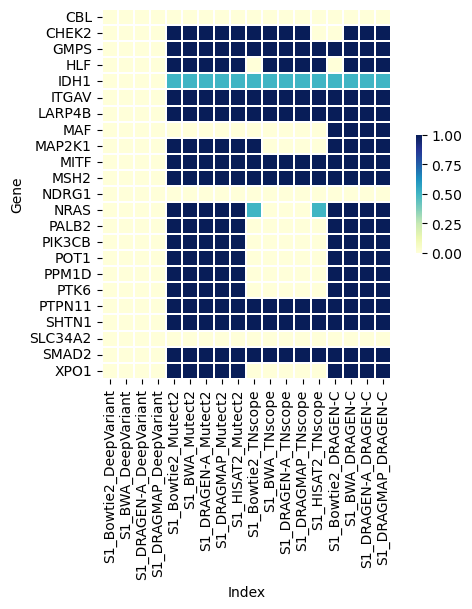

In [38]:
# COSMIC cancer genes less 100 samples 

df = pd.read_csv('Heatmap_less_100_sample_data.txt', header=None, sep='\t')
df.columns=['Sample', 'Aligner','Caller','Gene','Percentage']
df['Index'] = df['Sample']+'_'+df['Aligner']+'_'+df['Caller']
order = ['S1_Bowtie2_DeepVariant', 'S1_BWA_DeepVariant', 'S1_DRAGEN-A_DeepVariant', 'S1_DRAGMAP_DeepVariant', 'S2_Bowtie2_DeepVariant', 'S2_BWA_DeepVariant', 'S2_DRAGEN-A_DeepVariant', 'S2_DRAGMAP_DeepVariant', 'S3_Bowtie2_DeepVariant', 'S3_BWA_DeepVariant', 'S3_DRAGEN-A_DeepVariant', 'S3_DRAGMAP_DeepVariant', 'S4_Bowtie2_DeepVariant', 'S4_BWA_DeepVariant', 'S4_DRAGEN-A_DeepVariant', 'S4_DRAGMAP_DeepVariant', 'S5_Bowtie2_DeepVariant', 'S5_BWA_DeepVariant', 'S5_DRAGEN-A_DeepVariant', 'S5_DRAGMAP_DeepVariant', 'S6_Bowtie2_DeepVariant', 'S6_BWA_DeepVariant', 'S6_DRAGEN-A_DeepVariant', 'S6_DRAGMAP_DeepVariant', 'S7_Bowtie2_DeepVariant', 'S7_BWA_DeepVariant', 'S7_DRAGEN-A_DeepVariant', 'S7_DRAGMAP_DeepVariant', 'S8_Bowtie2_DeepVariant', 'S8_BWA_DeepVariant', 'S8_DRAGEN-A_DeepVariant', 'S8_DRAGMAP_DeepVariant', 'S9_Bowtie2_DeepVariant', 'S9_BWA_DeepVariant', 'S9_DRAGEN-A_DeepVariant', 'S9_DRAGMAP_DeepVariant', 'S1_Bowtie2_Mutect2', 'S1_BWA_Mutect2', 'S1_DRAGEN-A_Mutect2', 'S1_DRAGMAP_Mutect2', 'S1_HISAT2_Mutect2', 'S2_Bowtie2_Mutect2', 'S2_BWA_Mutect2', 'S2_DRAGEN-A_Mutect2', 'S2_DRAGMAP_Mutect2', 'S2_HISAT2_Mutect2', 'S3_Bowtie2_Mutect2', 'S3_BWA_Mutect2', 'S3_DRAGEN-A_Mutect2', 'S3_DRAGMAP_Mutect2', 'S3_HISAT2_Mutect2', 'S4_Bowtie2_Mutect2', 'S4_BWA_Mutect2', 'S4_DRAGEN-A_Mutect2', 'S4_DRAGMAP_Mutect2', 'S4_HISAT2_Mutect2', 'S5_Bowtie2_Mutect2', 'S5_BWA_Mutect2', 'S5_DRAGEN-A_Mutect2', 'S5_DRAGMAP_Mutect2', 'S5_HISAT2_Mutect2', 'S6_Bowtie2_Mutect2', 'S6_BWA_Mutect2', 'S6_DRAGEN-A_Mutect2', 'S6_DRAGMAP_Mutect2', 'S6_HISAT2_Mutect2', 'S7_Bowtie2_Mutect2', 'S7_BWA_Mutect2', 'S7_DRAGEN-A_Mutect2', 'S7_DRAGMAP_Mutect2', 'S7_HISAT2_Mutect2', 'S8_Bowtie2_Mutect2', 'S8_BWA_Mutect2', 'S8_DRAGEN-A_Mutect2', 'S8_DRAGMAP_Mutect2', 'S8_HISAT2_Mutect2', 'S9_Bowtie2_Mutect2', 'S9_BWA_Mutect2', 'S9_DRAGEN-A_Mutect2', 'S9_DRAGMAP_Mutect2', 'S9_HISAT2_Mutect2', 'S1_Bowtie2_TNscope', 'S1_BWA_TNscope', 'S1_DRAGEN-A_TNscope', 'S1_DRAGMAP_TNscope', 'S1_HISAT2_TNscope', 'S2_Bowtie2_TNscope', 'S2_BWA_TNscope', 'S2_DRAGEN-A_TNscope', 'S2_DRAGMAP_TNscope', 'S2_HISAT2_TNscope', 'S3_Bowtie2_TNscope', 'S3_BWA_TNscope', 'S3_DRAGEN-A_TNscope', 'S3_DRAGMAP_TNscope', 'S3_HISAT2_TNscope', 'S4_Bowtie2_TNscope', 'S4_BWA_TNscope', 'S4_DRAGEN-A_TNscope', 'S4_DRAGMAP_TNscope', 'S4_HISAT2_TNscope', 'S5_Bowtie2_TNscope', 'S5_BWA_TNscope', 'S5_DRAGEN-A_TNscope', 'S5_DRAGMAP_TNscope', 'S5_HISAT2_TNscope', 'S6_Bowtie2_TNscope', 'S6_BWA_TNscope', 'S6_DRAGEN-A_TNscope', 'S6_DRAGMAP_TNscope', 'S6_HISAT2_TNscope', 'S7_Bowtie2_TNscope', 'S7_BWA_TNscope', 'S7_DRAGEN-A_TNscope', 'S7_DRAGMAP_TNscope', 'S7_HISAT2_TNscope', 'S8_Bowtie2_TNscope', 'S8_BWA_TNscope', 'S8_DRAGEN-A_TNscope', 'S8_DRAGMAP_TNscope', 'S8_HISAT2_TNscope', 'S9_Bowtie2_TNscope', 'S9_BWA_TNscope', 'S9_DRAGEN-A_TNscope', 'S9_DRAGMAP_TNscope', 'S9_HISAT2_TNscope', 'S1_Bowtie2_DRAGEN-C', 'S1_BWA_DRAGEN-C', 'S1_DRAGEN-A_DRAGEN-C', 'S1_DRAGMAP_DRAGEN-C', 'S2_Bowtie2_DRAGEN-C', 'S2_BWA_DRAGEN-C', 'S2_DRAGEN-A_DRAGEN-C', 'S2_DRAGMAP_DRAGEN-C', 'S3_Bowtie2_DRAGEN-C', 'S3_BWA_DRAGEN-C', 'S3_DRAGEN-A_DRAGEN-C', 'S3_DRAGMAP_DRAGEN-C', 'S4_Bowtie2_DRAGEN-C', 'S4_BWA_DRAGEN-C', 'S4_DRAGEN-A_DRAGEN-C', 'S4_DRAGMAP_DRAGEN-C', 'S5_Bowtie2_DRAGEN-C', 'S5_BWA_DRAGEN-C', 'S5_DRAGEN-A_DRAGEN-C', 'S5_DRAGMAP_DRAGEN-C', 'S6_Bowtie2_DRAGEN-C', 'S6_BWA_DRAGEN-C', 'S6_DRAGEN-A_DRAGEN-C', 'S6_DRAGMAP_DRAGEN-C', 'S7_Bowtie2_DRAGEN-C', 'S7_BWA_DRAGEN-C', 'S7_DRAGEN-A_DRAGEN-C', 'S7_DRAGMAP_DRAGEN-C', 'S8_Bowtie2_DRAGEN-C', 'S8_BWA_DRAGEN-C', 'S8_DRAGEN-A_DRAGEN-C', 'S8_DRAGMAP_DRAGEN-C', 'S9_Bowtie2_DRAGEN-C', 'S9_BWA_DRAGEN-C', 'S9_DRAGEN-A_DRAGEN-C', 'S9_DRAGMAP_DRAGEN-C']
df1 = df.pivot(index='Gene', columns='Index', values='Percentage')
df2 = df1.reset_index()
df2 = df2.set_index('Gene')
df2=df2[order]


i=1
select = [e for e in order if "S1" in e]

exec("data = df2[select]")
exec("sns.heatmap(data=data, annot=False,cmap='YlGnBu',square=True,cbar=True,cbar_kws={'shrink': .32},"+
     "linecolor='w',linewidth=0.1)")




Drug associate genes result Fig5

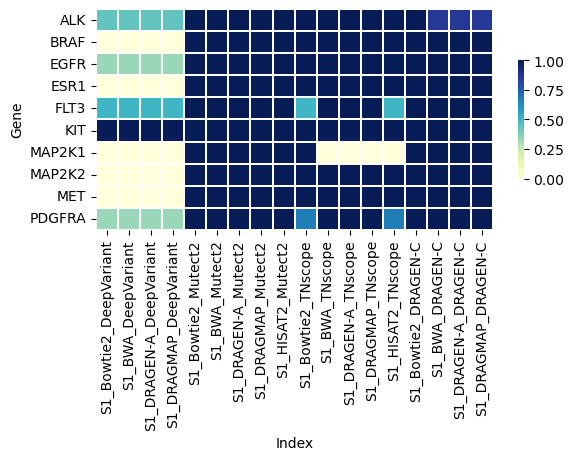

In [39]:
#Drug associate genes
# data transform
df = pd.read_csv('Drug_associate_gene_data.txt', header=None, sep='\t')
df.columns=['Sample', 'Aligner','Caller','Gene','Percentage']
df['Index'] = df['Sample']+'_'+df['Aligner']+'_'+df['Caller']
order = ['S1_Bowtie2_DeepVariant', 'S1_BWA_DeepVariant', 'S1_DRAGEN-A_DeepVariant', 'S1_DRAGMAP_DeepVariant', 'S2_Bowtie2_DeepVariant', 'S2_BWA_DeepVariant', 'S2_DRAGEN-A_DeepVariant', 'S2_DRAGMAP_DeepVariant', 'S3_Bowtie2_DeepVariant', 'S3_BWA_DeepVariant', 'S3_DRAGEN-A_DeepVariant', 'S3_DRAGMAP_DeepVariant', 'S4_Bowtie2_DeepVariant', 'S4_BWA_DeepVariant', 'S4_DRAGEN-A_DeepVariant', 'S4_DRAGMAP_DeepVariant', 'S5_Bowtie2_DeepVariant', 'S5_BWA_DeepVariant', 'S5_DRAGEN-A_DeepVariant', 'S5_DRAGMAP_DeepVariant', 'S6_Bowtie2_DeepVariant', 'S6_BWA_DeepVariant', 'S6_DRAGEN-A_DeepVariant', 'S6_DRAGMAP_DeepVariant', 'S7_Bowtie2_DeepVariant', 'S7_BWA_DeepVariant', 'S7_DRAGEN-A_DeepVariant', 'S7_DRAGMAP_DeepVariant', 'S8_Bowtie2_DeepVariant', 'S8_BWA_DeepVariant', 'S8_DRAGEN-A_DeepVariant', 'S8_DRAGMAP_DeepVariant', 'S9_Bowtie2_DeepVariant', 'S9_BWA_DeepVariant', 'S9_DRAGEN-A_DeepVariant', 'S9_DRAGMAP_DeepVariant', 'S1_Bowtie2_Mutect2', 'S1_BWA_Mutect2', 'S1_DRAGEN-A_Mutect2', 'S1_DRAGMAP_Mutect2', 'S1_HISAT2_Mutect2', 'S2_Bowtie2_Mutect2', 'S2_BWA_Mutect2', 'S2_DRAGEN-A_Mutect2', 'S2_DRAGMAP_Mutect2', 'S2_HISAT2_Mutect2', 'S3_Bowtie2_Mutect2', 'S3_BWA_Mutect2', 'S3_DRAGEN-A_Mutect2', 'S3_DRAGMAP_Mutect2', 'S3_HISAT2_Mutect2', 'S4_Bowtie2_Mutect2', 'S4_BWA_Mutect2', 'S4_DRAGEN-A_Mutect2', 'S4_DRAGMAP_Mutect2', 'S4_HISAT2_Mutect2', 'S5_Bowtie2_Mutect2', 'S5_BWA_Mutect2', 'S5_DRAGEN-A_Mutect2', 'S5_DRAGMAP_Mutect2', 'S5_HISAT2_Mutect2', 'S6_Bowtie2_Mutect2', 'S6_BWA_Mutect2', 'S6_DRAGEN-A_Mutect2', 'S6_DRAGMAP_Mutect2', 'S6_HISAT2_Mutect2', 'S7_Bowtie2_Mutect2', 'S7_BWA_Mutect2', 'S7_DRAGEN-A_Mutect2', 'S7_DRAGMAP_Mutect2', 'S7_HISAT2_Mutect2', 'S8_Bowtie2_Mutect2', 'S8_BWA_Mutect2', 'S8_DRAGEN-A_Mutect2', 'S8_DRAGMAP_Mutect2', 'S8_HISAT2_Mutect2', 'S9_Bowtie2_Mutect2', 'S9_BWA_Mutect2', 'S9_DRAGEN-A_Mutect2', 'S9_DRAGMAP_Mutect2', 'S9_HISAT2_Mutect2', 'S1_Bowtie2_TNscope', 'S1_BWA_TNscope', 'S1_DRAGEN-A_TNscope', 'S1_DRAGMAP_TNscope', 'S1_HISAT2_TNscope', 'S2_Bowtie2_TNscope', 'S2_BWA_TNscope', 'S2_DRAGEN-A_TNscope', 'S2_DRAGMAP_TNscope', 'S2_HISAT2_TNscope', 'S3_Bowtie2_TNscope', 'S3_BWA_TNscope', 'S3_DRAGEN-A_TNscope', 'S3_DRAGMAP_TNscope', 'S3_HISAT2_TNscope', 'S4_Bowtie2_TNscope', 'S4_BWA_TNscope', 'S4_DRAGEN-A_TNscope', 'S4_DRAGMAP_TNscope', 'S4_HISAT2_TNscope', 'S5_Bowtie2_TNscope', 'S5_BWA_TNscope', 'S5_DRAGEN-A_TNscope', 'S5_DRAGMAP_TNscope', 'S5_HISAT2_TNscope', 'S6_Bowtie2_TNscope', 'S6_BWA_TNscope', 'S6_DRAGEN-A_TNscope', 'S6_DRAGMAP_TNscope', 'S6_HISAT2_TNscope', 'S7_Bowtie2_TNscope', 'S7_BWA_TNscope', 'S7_DRAGEN-A_TNscope', 'S7_DRAGMAP_TNscope', 'S7_HISAT2_TNscope', 'S8_Bowtie2_TNscope', 'S8_BWA_TNscope', 'S8_DRAGEN-A_TNscope', 'S8_DRAGMAP_TNscope', 'S8_HISAT2_TNscope', 'S9_Bowtie2_TNscope', 'S9_BWA_TNscope', 'S9_DRAGEN-A_TNscope', 'S9_DRAGMAP_TNscope', 'S9_HISAT2_TNscope', 'S1_Bowtie2_DRAGEN-C', 'S1_BWA_DRAGEN-C', 'S1_DRAGEN-A_DRAGEN-C', 'S1_DRAGMAP_DRAGEN-C', 'S2_Bowtie2_DRAGEN-C', 'S2_BWA_DRAGEN-C', 'S2_DRAGEN-A_DRAGEN-C', 'S2_DRAGMAP_DRAGEN-C', 'S3_Bowtie2_DRAGEN-C', 'S3_BWA_DRAGEN-C', 'S3_DRAGEN-A_DRAGEN-C', 'S3_DRAGMAP_DRAGEN-C', 'S4_Bowtie2_DRAGEN-C', 'S4_BWA_DRAGEN-C', 'S4_DRAGEN-A_DRAGEN-C', 'S4_DRAGMAP_DRAGEN-C', 'S5_Bowtie2_DRAGEN-C', 'S5_BWA_DRAGEN-C', 'S5_DRAGEN-A_DRAGEN-C', 'S5_DRAGMAP_DRAGEN-C', 'S6_Bowtie2_DRAGEN-C', 'S6_BWA_DRAGEN-C', 'S6_DRAGEN-A_DRAGEN-C', 'S6_DRAGMAP_DRAGEN-C', 'S7_Bowtie2_DRAGEN-C', 'S7_BWA_DRAGEN-C', 'S7_DRAGEN-A_DRAGEN-C', 'S7_DRAGMAP_DRAGEN-C', 'S8_Bowtie2_DRAGEN-C', 'S8_BWA_DRAGEN-C', 'S8_DRAGEN-A_DRAGEN-C', 'S8_DRAGMAP_DRAGEN-C', 'S9_Bowtie2_DRAGEN-C', 'S9_BWA_DRAGEN-C', 'S9_DRAGEN-A_DRAGEN-C', 'S9_DRAGMAP_DRAGEN-C']
df1 = df.pivot(index='Gene', columns='Index', values='Percentage')
df2 = df1.reset_index()
df2 = df2.set_index('Gene')
df2=df2[order]



i=1
select = [e for e in order if "S1" in e]
exec("data = df2[select]")
exec("sns.heatmap(data=data, annot=False,cmap='YlGnBu',square=True,cbar=True,cbar_kws={'shrink': .32},"+
        "linecolor='w',linewidth=0.1)")
exec("fig"+str(i)+".set(xlabel='', ylabel='')")


Tumor mutation burden Supplementary Fig9

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

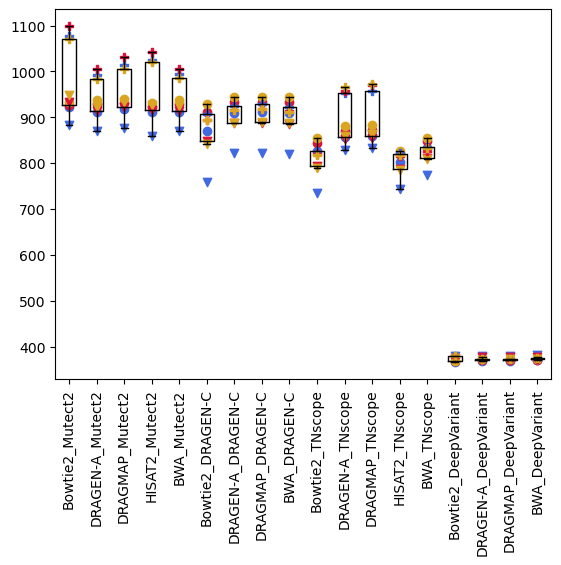

In [5]:
df = pd.read_csv('TMB.txt', sep='\t')
shape={'SRR13076390': 'o', 'SRR13076391': 'o', 'SRR13076392': 'o', 
       'SRR13076393': 'v', 'SRR13076394': 'v','SRR13076395': 'v',
       'SRR13076396': 'P', 'SRR13076397': 'P','SRR13076398': 'P'}
color={'SRR13076390': 'royalblue', 'SRR13076391': 'crimson', 'SRR13076392': 'goldenrod',
       'SRR13076393': 'royalblue', 'SRR13076394': 'crimson','SRR13076395': 'goldenrod',
       'SRR13076396': 'royalblue', 'SRR13076397': 'crimson','SRR13076398': 'goldenrod'}
sample = ['SRR13076390', 'SRR13076391', 'SRR13076392', 'SRR13076393',
       'SRR13076394', 'SRR13076395', 'SRR13076396', 'SRR13076397','SRR13076398']
tools_list = ['Bowtie2_Mutect2','DRAGEN-A_Mutect2','DRAGMAP_Mutect2', 'HISAT2_Mutect2',
 'BWA_Mutect2','Bowtie2_DRAGEN-C',   'DRAGEN-A_DRAGEN-C','DRAGMAP_DRAGEN-C','BWA_DRAGEN-C', 
 'Bowtie2_TNscope','DRAGEN-A_TNscope','DRAGMAP_TNscope','HISAT2_TNscope','BWA_TNscope',   
 'Bowtie2_DeepVariant','DRAGEN-A_DeepVariant','DRAGMAP_DeepVariant','BWA_DeepVariant']

# boxplot
df_data = []
for tool in tools_list:
    df_data.append(df[df['Tools']==tool]['TMB/MB'])

plt.boxplot(df_data,labels=tools_list,sym=' ', showmeans=False,
           medianprops={'lw':0}, meanline=False, positions=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])



# scatter
for s in sample:
    df1 = df[df['Sample'] == s]
    mark = shape[s]
    c = color[s]
    plt.scatter(df1['position'],df1['TMB/MB'], marker=mark, color=c, label=s)

plt.xticks(rotation=90)
